<a href="https://colab.research.google.com/github/moncybabu/sharing_github/blob/main/company_decision_tree_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [65]:
# import some data to play with
company = pd.read_csv('/content/Company_Data.csv')

In [66]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [71]:
company['High'] = company.Sales.map(lambda x: 1 if x>8 else 0)
company['ShelveLoc']=company['ShelveLoc'].astype('category')
company['Urban']=company['Urban'].astype('category')
company['US']=company['US'].astype('category')
company.dtypes
company.head()





,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0


In [72]:
company['ShelveLoc']=company['ShelveLoc'].cat.codes
company['Urban']=company['Urban'].cat.codes
company['US']=company['US'].cat.codes
company.tail()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
395,12.57,138,108,17,203,128,1,33,14,1,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1,0
397,7.41,162,26,12,368,159,2,40,18,1,1,0
398,5.94,100,79,7,284,95,0,50,12,1,1,0
399,9.71,134,37,0,27,120,1,49,16,1,1,1


In [73]:
x=company.iloc[:,1:11]
y=company['High']

In [74]:
# Splitting data into training and testing data set
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2,random_state=0)

# Building Decision Tree Classifier using Entropy Criteria

In [75]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

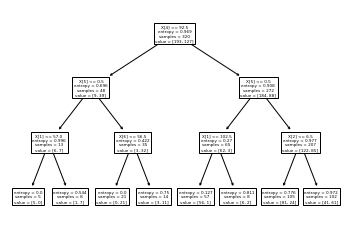

In [76]:
tree.plot_tree(model);


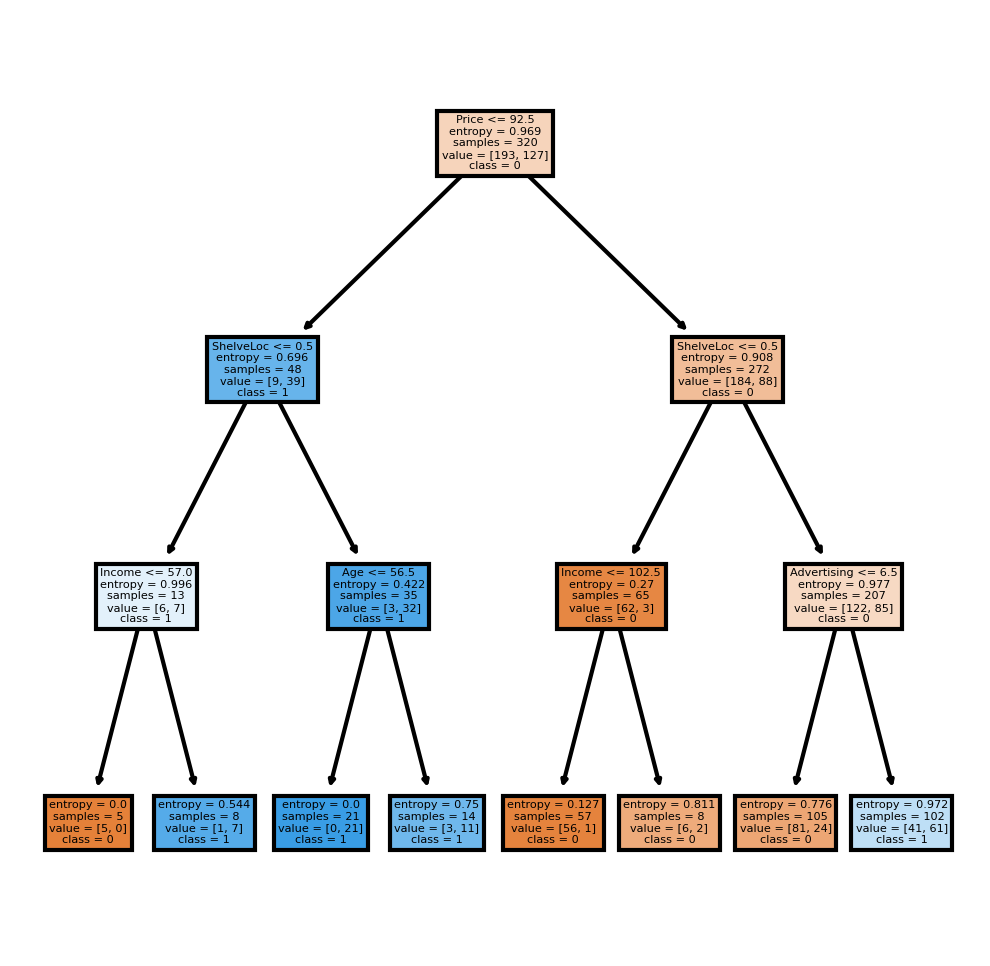

In [77]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['0','1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [10]:
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts()

0    45
1    35
dtype: int64

In [11]:
pd.crosstab(y_test,preds) 

col_0,0,1
High,,
0,33,10
1,12,25


In [12]:
np.mean(preds==y_test)

0.725

Building Decision Tree Classifier (CART) using Gini Criteria

In [13]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [14]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [15]:
pred=model.predict(x_test)
np.mean(preds==y_test)

0.725

In [16]:
from sklearn.tree import DecisionTreeRegressor

In [17]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [18]:
model.score(x_test,y_test)

-0.055939660590823344

ADABOOST CLASSIFIER

In [47]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

In [50]:
abd = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)

In [52]:
model3 = abd.fit(x_train, y_train)

In [53]:
y_pred = model3.predict(x_test)

In [54]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8625


BAGGING CLASSIFIER

In [55]:
from sklearn.ensemble import BaggingClassifier

In [57]:
abe = BaggingClassifier(base_estimator=cart, n_estimators=10, max_samples=1.0, max_features=1.0,)

In [59]:
model4 = abe.fit(x_train, y_train)

In [60]:
y_pred = model4.predict(x_test)

In [61]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7625



kfold and bagging

In [46]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.svm import SVC
seed = 7

kfold = KFold(n_splits=10, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 100
ab = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
model1 = ab.fit(x_train, y_train)
y_pred = model1.predict(x_test)
result = cross_val_score(model, x, y, cv=kfold)
print(result.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.8099999999999999


In [41]:
y_pred

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1])

In [25]:
?BaggingClassifier

kfold and boosting

In [44]:
num_trees = 10
seed=7
kfold = KFold(n_splits=10, random_state=seed)
abc = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
model2 = abc.fit(x_train, y_train)
y_pred = model2.predict(x_test)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.8099999999999999


In [45]:
y_pred

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

comparing all those we got high accuracy in adaboost classifier